Question 2
Step 1 Preparation for Aggregate national data, and rearrange rows and columns for coding.

In [82]:
import pandas as pd
import numpy as np

In [83]:
data = {'Country': ['B','C','D','E','F','G','H'],
        'Output,Q':[80,150,135,165,95,130,110],
        'Labour,L':[60,100,100,120,70,90,80],
        'Capital,K':[50,100,80,100,60,80,70]
        }
nation = pd.DataFrame(
    data, columns=['Country','Output,Q','Labour,L','Capital,K'])
nation

,Country,"Output,Q","Labour,L","Capital,K"
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


Use the pandas DataFrame object constructor with a dictionary of lists as argument. The value of each entry in the dictionary is the name of the column, and the lists are their values for different countries. 

a.For each of the data series (Q, L and K) calculate its mean, variance, standard deviation, and median values.

In [84]:
nation.describe()

,"Output,Q","Labour,L","Capital,K"
count,7.000000,7.000000,7.000000
mean,123.571429,88.571429,77.142857
std,30.237158,20.354010,18.898224
min,80.000000,60.000000,50.000000
25%,102.500000,75.000000,65.000000
50%,130.000000,90.000000,80.000000
75%,142.500000,100.000000,90.000000
max,165.000000,120.000000,100.000000


In [85]:
var = nation.var()
var

Output,Q     914.285714
Labour,L     414.285714
Capital,K    357.142857
dtype: float64

b.Plot histograms of the two data series Q and L.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

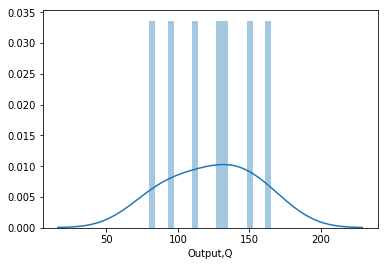

In [87]:
ax = sns.distplot(nation['Output,Q'],bins=20) 
plt.show()

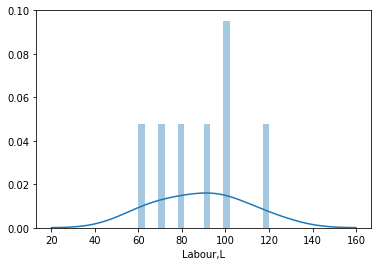

In [88]:
bx = sns.distplot(nation['Labour,L'],bins=20) 
plt.show()

c. A Cobb-Douglas production function takes the form Q = ALαKβ. You will ﬁt this model by take a log transform of the data above.Print the log values in your Jupyter notebook.

In [89]:
data = {'Country': ['B','C','D','E','F','G','H'],
        'logQ':np.log([80,150,135,165,95,130,110]),
        'logL':np.log([60,100,100,120,70,90,80]),
        'logK':np.log([50,100,80,100,60,80,70])
        }
log_nation = pd.DataFrame(
    data, columns=['Country','logQ','logL','logK'])
log_nation

,Country,logQ,logL,logK
0,B,4.382027,4.094345,3.912023
1,C,5.010635,4.605170,4.605170
2,D,4.905275,4.605170,4.382027
3,E,5.105945,4.787492,4.605170
4,F,4.553877,4.248495,4.094345
5,G,4.867534,4.499810,4.382027
6,H,4.700480,4.382027,4.248495


d. Fit a multiple regression model to the data. Report your ﬁndings in your Jupyter notebook. Do the data indicate a constant returns to scale model is reasonable (α + β = 1)—that is, the model is homogeneous of degree one?

Fit logQ = logA+αlogL+βlogK

In [98]:
import statsmodels.api as sm 
x = log_nation[["logL", "logK"]] 
print(x.shape) 
y = log_nation["logQ"] 
x = sm.add_constant(x) 
model = sm.OLS(y,x).fit() 
predictions = model.predict(x) 
model.summary()

(7, 2)


C:\Users\heidi\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.34e-06
Time:                        22:07:47   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.269      -0.170       0.463
logL           0.5484      0.090      6.127      0.004       0.300       0.797
logK           0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. Plot the residuals associated with your modelling above.

f.Calculate the adjusted R2 of your model.

From part d, adjusted R2 is 0.997.